<a href="https://colab.research.google.com/github/arbeeorlar/data_science/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
# Install the Python package
!pip install pydot

# Install Graphviz system binaries
!apt-get install -y graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [164]:
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn import tree
from io import StringIO
import pydot
from IPython.display import Image as PImage
from sklearn.tree import export_graphviz


from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [ ]:
np.random.seed(2)

In [9]:
pageSpeed = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeed

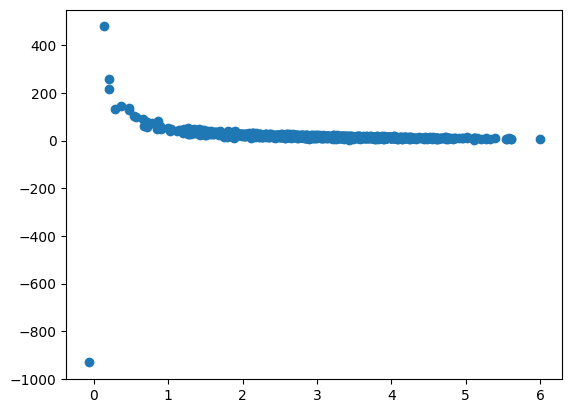

In [10]:
scatter(pageSpeed, purchaseAmount)

In [30]:
trainY = pageSpeed[:80]
testY = pageSpeed[80:]

In [31]:
trainX = purchaseAmount[:80]
testX = purchaseAmount[80:]

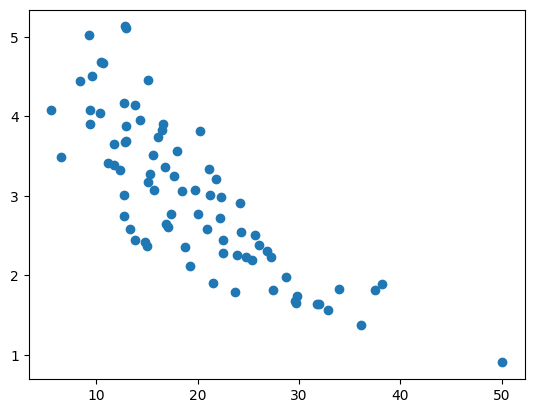

In [32]:
scatter(trainX, trainY)

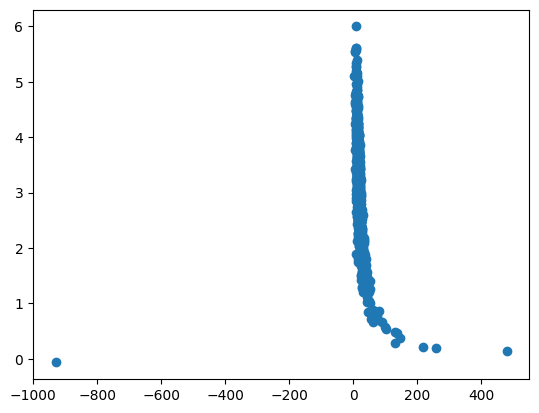

In [33]:
scatter(testX, testY)

In [69]:
dataframeCopy = pd.read_csv('/content/sample_data/PastHires.csv')

In [71]:
dataframe = dataframeCopy.copy()

In [72]:
dataframe.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [46]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Years Experience    13 non-null     int64 
 1   Employed?           13 non-null     object
 2   Previous employers  13 non-null     int64 
 3   Level of Education  13 non-null     object
 4   Top-tier school     13 non-null     object
 5   Interned            13 non-null     object
 6   Hired               13 non-null     object
dtypes: int64(2), object(5)
memory usage: 860.0+ bytes


In [43]:
dataframe.isnull().sum()

,0
Years Experience,0
Employed?,0
Previous employers,0
Level of Education,0
Top-tier school,0
Interned,0
Hired,0


In [50]:
pd_dummy = pd.get_dummies(dataframe)
pd_dummy.head()

,Years Experience,Previous employers,Employed?_N,Employed?_Y,Level of Education_BS,Level of Education_MS,Level of Education_PhD,Top-tier school_N,Top-tier school_Y,Interned_N,Interned_Y,Hired_N,Hired_Y
0,10,4,False,True,True,False,False,True,False,True,False,False,True
1,0,0,True,False,True,False,False,False,True,False,True,False,True
2,7,6,True,False,True,False,False,True,False,True,False,True,False
3,2,1,False,True,False,True,False,False,True,True,False,False,True
4,20,2,True,False,False,False,True,False,True,True,False,True,False


In [51]:
combine_df = pd.concat([dataframe, pd_dummy], axis=1)

In [52]:
combine_df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired,Years Experience,Previous employers,Employed?_N,Employed?_Y,Level of Education_BS,Level of Education_MS,Level of Education_PhD,Top-tier school_N,Top-tier school_Y,Interned_N,Interned_Y,Hired_N,Hired_Y
0,10,Y,4,BS,N,N,Y,10,4,False,True,True,False,False,True,False,True,False,False,True
1,0,N,0,BS,Y,Y,Y,0,0,True,False,True,False,False,False,True,False,True,False,True
2,7,N,6,BS,N,N,N,7,6,True,False,True,False,False,True,False,True,False,True,False
3,2,Y,1,MS,Y,N,Y,2,1,False,True,False,True,False,False,True,True,False,False,True
4,20,N,2,PhD,Y,N,N,20,2,True,False,False,False,True,False,True,True,False,True,False


In [58]:
x_train, x_test, y_train, y_test = train_test_split(combine_df, dataframe["Years Experience"], test_size=0.20, random_state=0)

In [55]:
x_train

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired,Years Experience,Previous employers,Employed?_N,Employed?_Y,Level of Education_BS,Level of Education_MS,Level of Education_PhD,Top-tier school_N,Top-tier school_Y,Interned_N,Interned_Y,Hired_N,Hired_Y
10,1,N,1,PhD,Y,N,N,1,1,True,False,False,False,True,False,True,True,False,True,False
2,7,N,6,BS,N,N,N,7,6,True,False,True,False,False,True,False,True,False,True,False
8,15,Y,5,BS,N,N,Y,15,5,False,True,True,False,False,True,False,True,False,False,True
1,0,N,0,BS,Y,Y,Y,0,0,True,False,True,False,False,False,True,False,True,False,True
7,3,N,1,BS,N,Y,Y,3,1,True,False,True,False,False,True,False,False,True,False,True
9,0,N,0,BS,N,N,N,0,0,True,False,True,False,False,True,False,True,False,True,False
3,2,Y,1,MS,Y,N,Y,2,1,False,True,False,True,False,False,True,True,False,False,True
0,10,Y,4,BS,N,N,Y,10,4,False,True,True,False,False,True,False,True,False,False,True
5,0,N,0,PhD,Y,Y,Y,0,0,True,False,False,False,True,False,True,False,True,False,True
12,0,N,0,PhD,Y,N,Y,0,0,True,False,False,False,True,False,True,True,False,False,True


In [118]:
# Map 'Y'/'N' to 1/0
d = {'Y': 1, 'N': 0}
dataframeCopy['Hired'] = dataframeCopy['Hired'].map(d)
dataframeCopy['Employed?'] = dataframeCopy['Employed?'].map(d)
dataframeCopy['Top-tier school'] = dataframeCopy['Top-tier school'].map(d)
dataframeCopy['Interned'] = dataframeCopy['Interned'].map(d)

# Map education levels to numbers
edu_map = {'BS': 0, 'MS': 1, 'PhD': 2}
dataframeCopy['Level of Education'] = dataframeCopy['Level of Education'].map(edu_map)

In [119]:
dataframeCopy.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [121]:
feature = list(dataframeCopy.columns[:6])

In [122]:
feature

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [165]:
x = dataframeCopy[feature]

In [166]:
y = dataframeCopy["Hired"]

In [167]:
clf = tree.DecisionTreeClassifier()


In [168]:
clf = clf.fit(x,y)

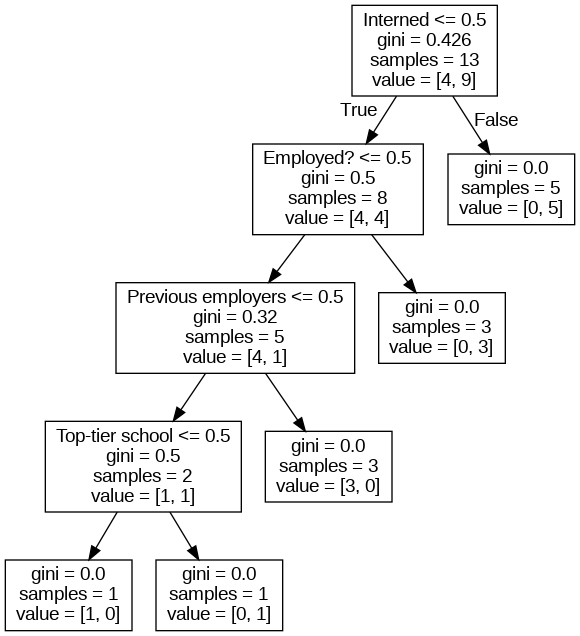

In [170]:
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data, feature_names=feature)
# graph = pydot.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=feature)

graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
PImage(graph.create_png())
